In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
import numpy as np
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer ## HAndle Missing Values
from sklearn.preprocessing import StandardScaler ## Feature Scaling
from sklearn.preprocessing import OneHotEncoder ## categorical to numerical
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
import xgboost as xb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedGroupKFold
import sweetviz as sv 
pd.set_option('display.max_columns',None)
plt.rcParams['figure.figsize']=(15,10)
from sklearn.feature_selection import mutual_info_classif  ## good for only classification problem 
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler

In [2]:
df=pd.read_csv('og1.csv')

In [3]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hours,Duration_minutes,Journey_year,Journey_month,Journey_day,Dep_hour,Dep_minute,Arv_hour,Arv_minute
0,IndiGo,Banglore,New Delhi,"['BLR ', ' DEL']",non-stop,No info,3897,2.0,50,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,"['CCU ', ' IXR ', ' BBI ', ' BLR']",2 stops,No info,7662,7.0,25,2019,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,"['DEL ', ' LKO ', ' BOM ', ' COK']",2 stops,No info,13882,19.0,0,2019,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,"['CCU ', ' NAG ', ' BLR']",1 stop,No info,6218,5.0,25,2019,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,"['BLR ', ' NAG ', ' DEL']",1 stop,No info,13302,4.0,45,2019,3,1,16,50,21,35


In [4]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Total_Stops         0
Additional_Info     0
Price               0
Duration_hours      1
Duration_minutes    0
Journey_year        0
Journey_month       0
Journey_day         0
Dep_hour            0
Dep_minute          0
Arv_hour            0
Arv_minute          0
dtype: int64

In [5]:
df['Duration_hours'].fillna(df['Duration_hours'].mean(),inplace=True)
df['Duration_hours']=df['Duration_hours'].astype('int16')

In [6]:
## There are very few null value present in our dataset

In [7]:
df.duplicated().sum()

222

In [8]:
## There are some duplicates present in our dataset

In [9]:
numerical_feat=[feature for feature in df.columns if df[feature].dtype!='O']
numerical_feat
numerical_feat.remove('Duration_hours')
numerical_feat.remove('Duration_minutes')
numerical_feat.remove('Journey_year')
numerical_feat.remove('Journey_month')
numerical_feat.remove('Journey_day')
numerical_feat.remove('Dep_hour')
numerical_feat.remove('Dep_minute')
numerical_feat.remove('Arv_hour')
numerical_feat.remove('Arv_minute')

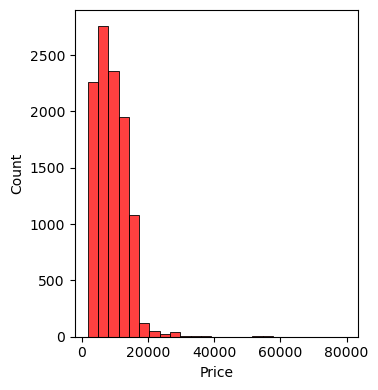

In [10]:
plt.figure(figsize=(10,4))
for i,feature in enumerate(numerical_feat,1):
    plt.subplot(1,3,i)
    sns.histplot(df[feature],color='r',bins=25)
plt.tight_layout()
plt.show()

In [11]:
## Price feature is right skewed

In [12]:
temporal_feature=['Duration_hours','Duration_minutes','Journey_year','Journey_month','Journey_day','Dep_hour','Dep_minute','Arv_hour','Arv_minute']

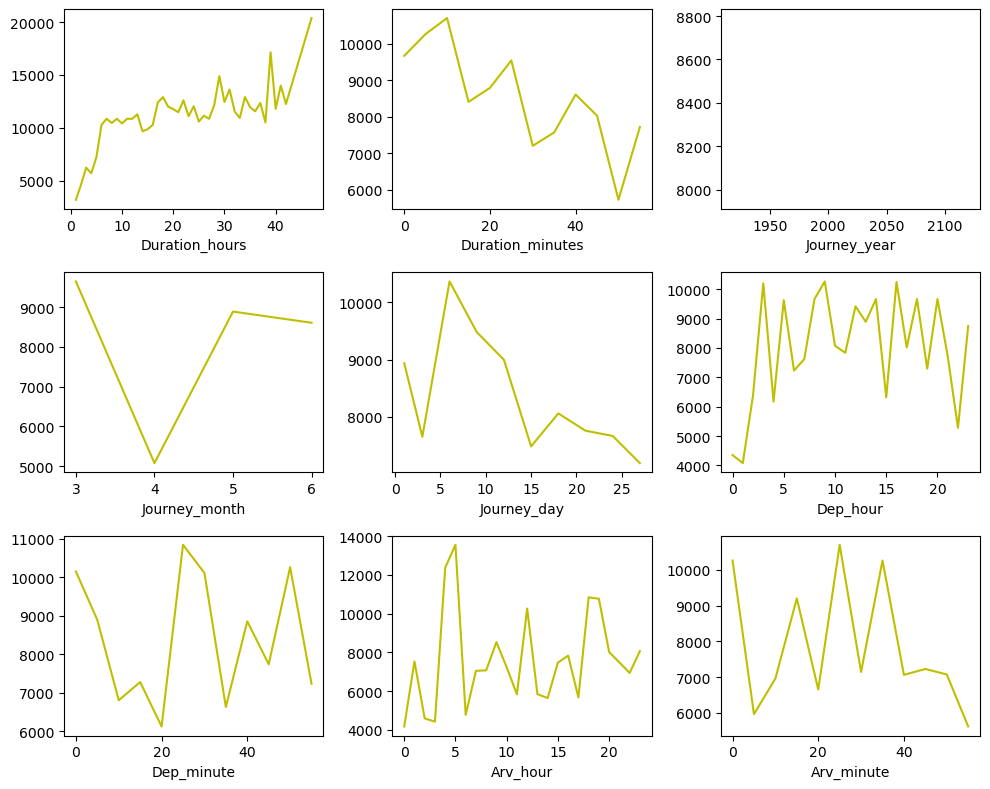

In [13]:
plt.figure(figsize=(10,8))
for i,feature in enumerate(temporal_feature,1):
    plt.subplot(3,3,i)
    df_copy=df
    df_copy.groupby(feature)['Price'].median().plot(color='y')
plt.tight_layout()
plt.show()

In [14]:
df['Journey_year'].value_counts()

Journey_year
2019    10683
Name: count, dtype: int64

In [15]:
### we have only data of 2019 
## jounrey month and jouney day is highly correalted to the price
## flight of high duration are expensive 

In [16]:
cat_feat=[feature for feature in df.columns if df[feature].dtype=='O']

In [23]:
cat_feat.remove('Route')

In [24]:
cat_feat

['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

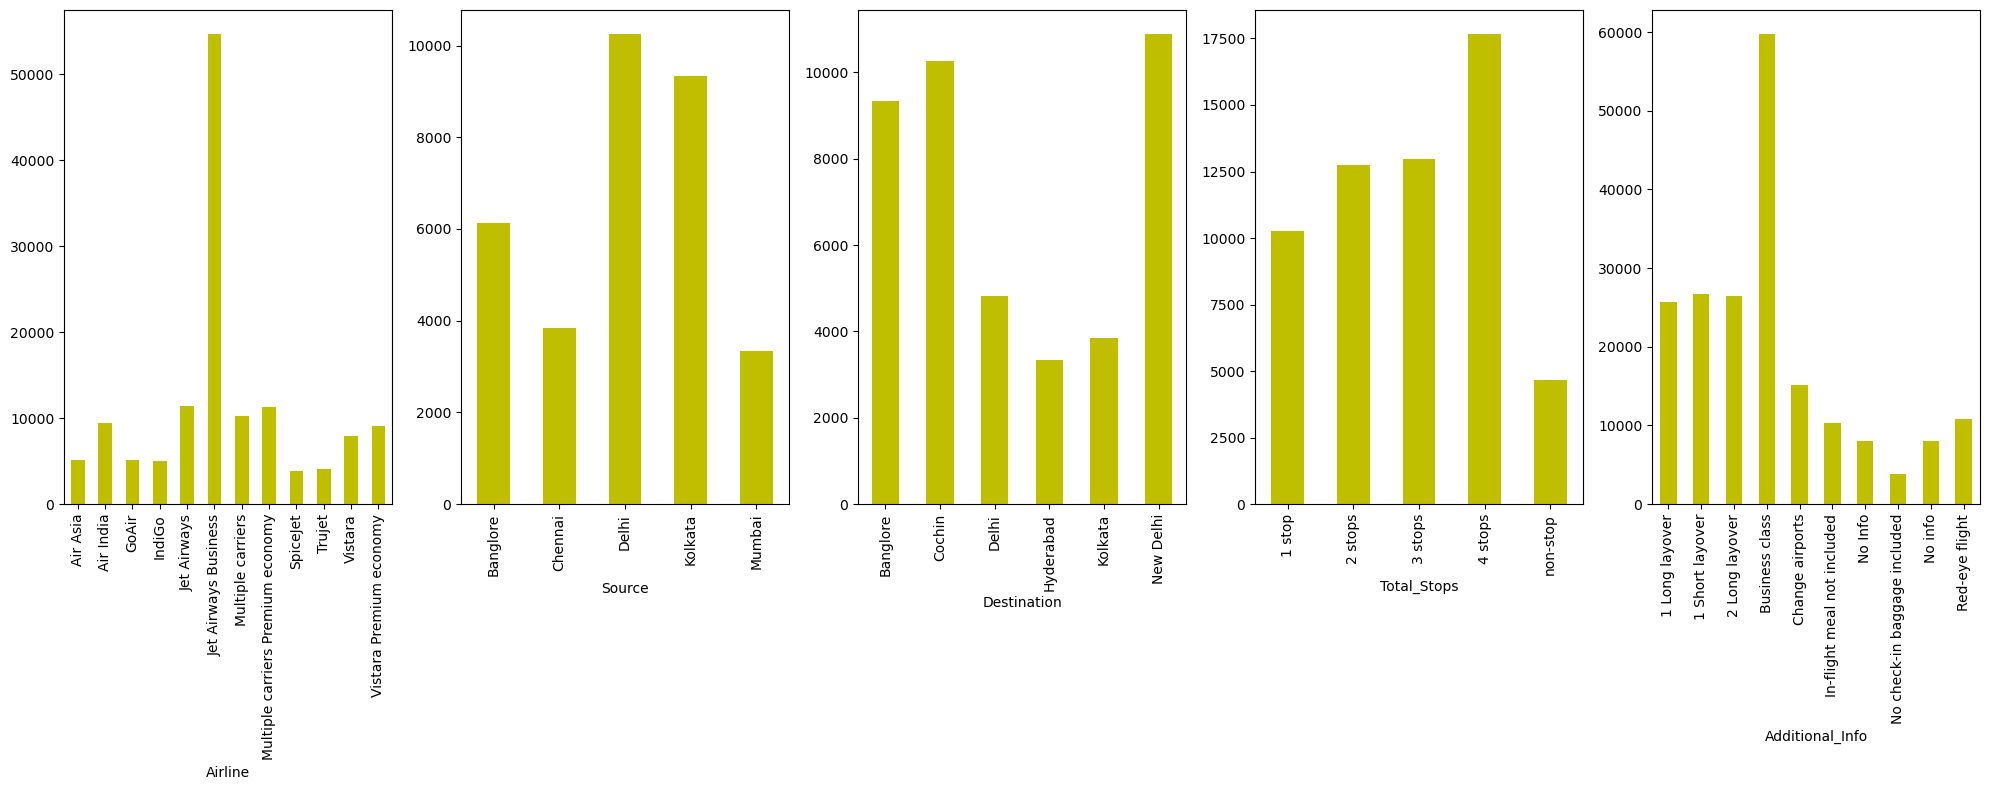

In [28]:
plt.figure(figsize=(20,8))
for i,feature in enumerate(cat_feat,1):
    plt.subplot(1,5,i)
    df_copy=df
    df_copy.groupby(feature)['Price'].median().plot(kind='bar',color='y')
plt.tight_layout()
plt.show()

In [29]:
## people arriving in new delhi have high cost 
## ticker price is expensive in delhi 
## 4 total_stops have high price 
## most expensive is buisness class 
## jet airways buisness class is expnesive 

In [30]:
df['Price'].max()

79512

In [31]:
## maximum price of a flight is 79512